<a href="https://colab.research.google.com/github/kelleyl54/DSPS_LKelley/blob/master/HW4_lKelley/DSPS_HW3_lKelley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$F=ma=\frac{mv^2}{r}$ For uniform circular motion

$\frac{mv^2}{r}=\frac{GMm}{r^2}$ Newton's Law of Gravity

$v^2=\frac{Gm}{r}$


## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31=pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv",header=1)
m31.columns=['r','v','dv','err']

In [3]:
#my attempt
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [4]:

m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [5]:
#my attempt
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [6]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [7]:
# 3.167 x 1 degrees
# 778 +/- 33 kpc
#values taken from wikipedia
apparentSizeM31 = 3.167 #deg 3.167/2 <-------------
distanceM31 = 778 #kpc 
distUnc = 33 #uncertainty in kpc


<span style="color:red">**-0.1 pt: for using diameter not radius**</span>

In [8]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [9]:
#print("First measurement outside of the visible radius:")
#round(m31[m31.r > m31size].r.values[0], 2) * u.kpc

m31dist = distanceM31 * u.kpc
m31distun =  distUnc * u.kpc
print (m31dist,m31distun)

778.0 kpc 33.0 kpc


In [10]:
m31size = m31dist * m31angS.to(u.arcsecond)
m31size = m31size.value * u.kau
m31sizeUnc = m31distun * m31angS.to(u.arcsecond)
m31sizeUnc = m31sizeUnc.value * u.kau
m31size = m31size.to(u.kpc)
print("Size of the visible component of Andromeda:{:.2f} ".format(m31size)+"+/- {:.2f}".format(m31sizeUnc.to(u.kpc)))

Size of the visible component of Andromeda:43.00 kpc +/- 1.82 kpc


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [11]:
m31.where(m31.r > m31size/2 * 1).dropna().iloc[0]

r       23.738
v      236.511
dv      11.729
err      1.580
Name: 30, dtype: float64

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [12]:
#dr = 2r dv / v (dervied by S.F.)

Derving the expression for the uncertainty in r:

$\delta r = \sqrt{((\frac{\delta r}{\delta v})\delta v)^2}$


$r=Gmv^{-2}$


$\delta r= \frac{-Gm(r)}{v^3} \delta v$


$m(r)=\frac{v^2r}{G}$


$\delta r = |\frac{-2G(\frac{v^2r}{G})\delta v}{v^3}|$


$\delta r = \frac{2r\delta v}{v}$



We derived the uncertainty in radius though the values of velocity and uncertainty in velocity using differential form. 

In [13]:
#our getradii function, which finds the lowest value greater than a multiple of the luminous radius
#this function also includes the uncertainty in the radius using the relationship described directly above.
def getradii(gal, gsize, n):
  tmp = gal.where(gal.r > (gsize)/2 * n).dropna()
  output = tmp.iloc[0]
  output['dr'] = 2*output.r*output.dv/output.v
  return(output)

getradii(m31, m31size, 3)

r       70.880000
v      218.489000
dv     132.355000
err     24.657000
dr      85.874551
Name: 36, dtype: float64

In [14]:
getradii(m31, m31size, 1.0)

r       23.738000
v      236.511000
dv      11.729000
err      1.580000
dr       2.354419
Name: 30, dtype: float64

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

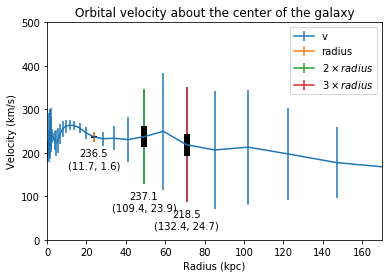

In [15]:
#our function recreating the plot of the GRC for a given galaxy
def plotGal(gal,rgal):
  pl.errorbar(gal.r,gal.v,yerr=gal.dv)
  pl.xlim((0,170))
  pl.ylim((0,500))
  
  for n in [1,2,3]:
    npoint = getradii(gal,rgal,n)
    pl.errorbar(npoint.r,npoint.v,yerr=npoint.dv)
    pl.text(npoint.r,npoint.v-npoint.dv-40,"{:0.1f}\n({:0.1f}, {:0.1f})".
        format(npoint.v,npoint.dv,npoint.err),
        verticalalignment='center',horizontalalignment='center')
    
  for n in [1,2,3]:
    npoint = getradii(gal,rgal,n)
    pl.errorbar(npoint.r,npoint.v,yerr=npoint.err,color='k',elinewidth=6)
    
    
  pl.legend(('v','radius','$2\\times radius$','$3\\times radius$'))
  pl.xlabel("Radius (kpc)")
  pl.ylabel("Velocity (km/s)")
  pl.title("Orbital velocity about the center of the galaxy")
  
  
  




plotGal(m31,m31size)

**Figure 1: GRC for the Andromeda galaxy, matching figure 2 of the source material and showing the key points at the integer multiples of the radius. Orbital velocities are plotted with respect to the radius along with the error bars in these measurements, using a standard deviation for the length of the bar.**

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [16]:
#performing the analysis on the actual ratio of velocities compared to the predicted ratio of the velocities

def vratios(gal, gsize, n, err='dv'):
  #choosing the multiple of the radius for our comparison
  output = getradii(gal,gsize,n)
  output['predict_v'] = output.r**(-0.5)
  
  #setting the ratio to compare to one radius
  baseline = getradii(gal,gsize,1)
  baseline['predict_v'] = baseline.r**(-0.5)
  
  #defining the velocity ratios we will use to commpare
  data_ratio = output.v / baseline.v
  predict_ratio = output.predict_v / baseline.predict_v
  
  #using the definition of uncertainty for a quotient (for 'dv')
  d_data_ratio = data_ratio * np.sqrt( (output.dv / output.v)**2 + (baseline.dv / baseline.v)**2 )
  
  #finding the 2 - sigma limit
  d_upper_lim = data_ratio + 2 * d_data_ratio
  d_lower_lim = data_ratio - 2 * d_data_ratio
  
  #doing the same thing with 'err'
  
  err_data_ratio = data_ratio * np.sqrt((output.err / output.v)**2 + (baseline.err / baseline.v)**2)
  err_upper_lim = data_ratio + 2 * err_data_ratio
  err_lower_lim = data_ratio - 2 * err_data_ratio
  
  print("using dv first:")
  
  
  #printing the results and determining significance
  
  print("The predicted ratio of the velocities is {:.4f}, while the measured\n\
  velocity ratio is {:.4f}. The 2-sigma range for the predicted ratio\n\
  ratio (according to the actual ratio) is between {:.4f} and {:.4f}".format(predict_ratio, data_ratio, d_lower_lim, d_upper_lim))
  
  if predict_ratio <= d_upper_lim and predict_ratio >= d_lower_lim:
    print("The predicted ratio does fall within the 2-sigma confidence range for the actual ratio")
  else:
    print("The predicted ratio does *not* fall within the 2-sigma confidence range for the actual ratio")
    
  
  print("\n\nusing err now:")
  
  print("The predicted ratio of the velocities is {:.4f}, while the measured\n\
  velocity ratio is {:.4f}. The 2-sigma range for the predicted ratio\n\
  ratio (according to the actual ratio) is between {:.4f} and {:.4f}".format(predict_ratio, data_ratio, err_lower_lim, err_upper_lim))
  
  if predict_ratio <= err_upper_lim and predict_ratio >= err_lower_lim:
    print("The predicted ratio does fall within the 2-sigma confidence range for the actual ratio")
  else:
    print("The predicted ratio does *not* fall within the 2-sigma confidence range for the actual ratio")

#looping through the multiples of the galaxy's luminous radius from 2 to 6 times. 
 
for n in range(2,7):
  print("N=",n)
  vratios(m31,m31size,n)
  print("\n---\n")
      

N= 2
using dv first:
The predicted ratio of the velocities is 0.6945, while the measured
  velocity ratio is 1.0024. The 2-sigma range for the predicted ratio
  ratio (according to the actual ratio) is between 0.0721 and 1.9326
The predicted ratio does fall within the 2-sigma confidence range for the actual ratio


using err now:
The predicted ratio of the velocities is 0.6945, while the measured
  velocity ratio is 1.0024. The 2-sigma range for the predicted ratio
  ratio (according to the actual ratio) is between 0.7996 and 1.2051
The predicted ratio does *not* fall within the 2-sigma confidence range for the actual ratio

---

N= 3
using dv first:
The predicted ratio of the velocities is 0.5787, while the measured
  velocity ratio is 0.9238. The 2-sigma range for the predicted ratio
  ratio (according to the actual ratio) is between -0.1992 and 2.0468
The predicted ratio does fall within the 2-sigma confidence range for the actual ratio


using err now:
The predicted ratio of the ve

<span style="color:red">**-0.2 pt: should print out uncertainty**</span>

<span style="color:red">**-0.25 pt: check your prediction radio computation code, and only compare 1Xradius with 2Xradius and 1Xradius with 3Xradius**</span>

### Discuss!

When comparing the predicted ratios in velocity (determine by Newton's work) to the actual ratio in velocity, the group found that when using the standard deviation in velocity, the predicted ratio fell within the 2-sigma confidence range of the actual ratio for all multiples of the galaxy's radius from 2 through 6, inclusive. 

However, when comparing the ratios using the total error budget for the data set, the group found that the predicted ratio did not fall within the 95% confidence range for the actual ratio. Thus, there is a significant discrepancy between the radius-velocity relationship predicted by classical theories and the actual data collected through observation. 

Using the total error budget for this analysis seems to be the correct choice to accurately show that there is a significant difference between theory and observation. This error budget is a more sensitive value that the standard deviation in the velocity measurements.

The fact that the discrepancy is statistically signficant lends itself to the theory of the existence of dark matter along with the luminous mass of the galaxy.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [17]:
# reading in
mw=pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv",header=1)
mw.columns=['r','v','dv','err']

In [18]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [19]:
mw.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [20]:
#average value of the diameter of the Milky Way (taken from wikipedia)
mwsize = 53.5 * u.kpc

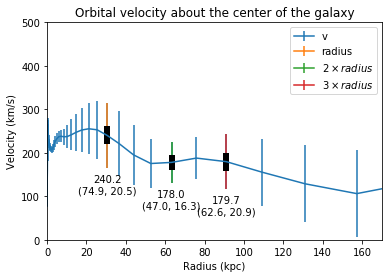

In [21]:
plotGal(mw,mwsize)

**Figure 2: GRC for the Milky Way Galaxy, showing the key points at the first three integer multiples of the radius. Orbital velocities are plotted with respect to the radius along with the error bars in these measurements, using a standard deviation for the length of the bar.**

In [22]:
    
for n in range(2,7):
  print("N=",n)
  vratios(mw,mwsize,n)
  print("\n---\n")

N= 2
using dv first:
The predicted ratio of the velocities is 0.6944, while the measured
  velocity ratio is 0.7411. The 2-sigma range for the predicted ratio
  ratio (according to the actual ratio) is between 0.1355 and 1.3467
The predicted ratio does fall within the 2-sigma confidence range for the actual ratio


using err now:
The predicted ratio of the velocities is 0.6944, while the measured
  velocity ratio is 0.7411. The 2-sigma range for the predicted ratio
  ratio (according to the actual ratio) is between 0.5551 and 0.9271
The predicted ratio does fall within the 2-sigma confidence range for the actual ratio

---

N= 3
using dv first:
The predicted ratio of the velocities is 0.5787, while the measured
  velocity ratio is 0.7482. The 2-sigma range for the predicted ratio
  ratio (according to the actual ratio) is between 0.0487 and 1.4477
The predicted ratio does fall within the 2-sigma confidence range for the actual ratio


using err now:
The predicted ratio of the velocitie

For the Milky Way galaxy, there was no statistical significance found between the ratio of the predicted velocities and the ratio of the actual velocities, regardless of whether dv or err was used at any multiple of the radius of the luminous matter.

A possible explanation for this lack of signficance compared to Andromeda is that the errors for the Milky Way measurements are much larger due to all observations occurring inside the galaxy. Thus, it is much harder to get accurate readings for these measurements due to the presence of matter interior to the galaxy inhibiting these measurements. It is also possible that this different result was caused by the distance used for the diameter of the Milky Way, which was a topic of discussion among our group.